In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv(r"C:\Users\Suraj\Desktop\titanic.csv")

In [3]:
df

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
df.drop(["Cabin","PassengerId","Ticket","Name"],axis=1,inplace=True) 

In [5]:
df

,Survived,Pclass,Gender,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [6]:
# Fillna value in Age column using median -- numerical column
df["Age"].fillna(df["Age"].median(),inplace=True)

C:\Users\Suraj\AppData\Local\Temp\ipykernel_11832\2402340545.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Age"].fillna(df["Age"].median(),inplace=True)


In [7]:
df

,Survived,Pclass,Gender,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,28.0,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [8]:
df.isnull().sum()

Survived    0
Pclass      0
Gender      0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [9]:
# Fillna value in Embarked column using median -- Text column
df["Embarked"].fillna(df["Embarked"].mode()[0],inplace=True)

C:\Users\Suraj\AppData\Local\Temp\ipykernel_11832\1959063920.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Embarked"].fillna(df["Embarked"].mode()[0],inplace=True)


In [10]:
df.isnull().sum()

Survived    0
Pclass      0
Gender      0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

<Axes: ylabel='Age'>

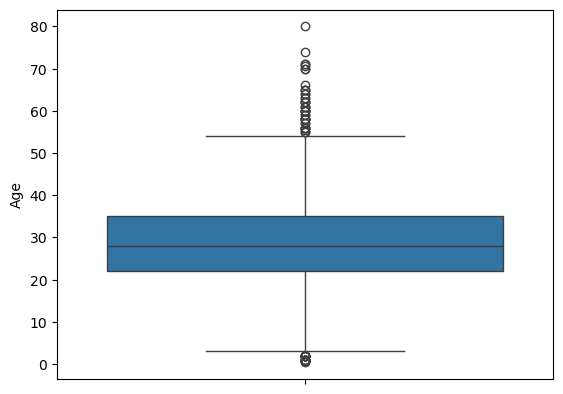

In [11]:
# Show outlier in each column visual using 
import seaborn as sns # Library for visual reprentation
sns.boxplot(df["Age"]) # Outlier in age column

In [12]:
# Remove the outlier's in each column
for i in df.columns:
    if df[i].dtype == "int64" or df[i].dtype == "float64":
        q1 = df[i].quantile(0.25)
        q3 = df[i].quantile(0.75)
        iqr = q3-q1
        lower_bound = q1-1.5*iqr
        upper_bound = q3+1.5*iqr
        outliers = df[(df[i] < lower_bound) | (df[i] > upper_bound)]
        print(f"Outliers in {i}:")
        print(outliers)
        print()

Outliers in Survived:
Empty DataFrame
Columns: [Survived, Pclass, Gender, Age, SibSp, Parch, Fare, Embarked]
Index: []

Outliers in Pclass:
Empty DataFrame
Columns: [Survived, Pclass, Gender, Age, SibSp, Parch, Fare, Embarked]
Index: []

Outliers in Age:
     Survived  Pclass  Gender    Age  SibSp  Parch     Fare Embarked
7           0       3    male   2.00      3      1  21.0750        S
11          1       1  female  58.00      0      0  26.5500        S
15          1       2  female  55.00      0      0  16.0000        S
16          1       3    male   2.00      4      1  29.1250        Q
33          0       2    male  66.00      0      0  10.5000        S
..        ...     ...     ...    ...    ...    ...      ...      ...
827         1       2    male   1.00      0      2  37.0042        C
829         1       1  female  62.00      0      0  80.0000        S
831         1       2    male   0.83      1      1  18.7500        S
851         0       3    male  74.00      0      0   7.

In [13]:
# iqr method for using remove outlier 
# iqr is a inter quartile range
# it used for normal distribution data
# iqr follow quartile method 
# it have four quarter

In [14]:
# info function gives the all information related to data 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Gender    891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [15]:
df.head(3)

,Survived,Pclass,Gender,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S


In [16]:
# all graph name of numerical data 

# matplotlib are used for data visualization of any data value 
# the data comes in two format numerical and categorical
# graph are many of types for represent any data 
# barchart
# countplot
# hist plot
# vilon plot
# line plot
# scatter plot kde plot # kernal density  estimation
# pie chart
# double bar graph 

<BarContainer object of 891 artists>

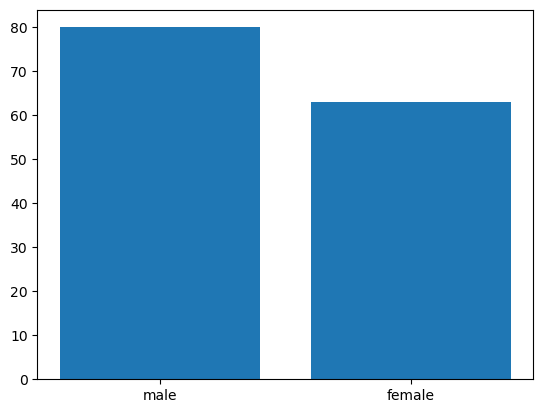

In [17]:
# create bar plot
import matplotlib.pyplot as plt
plt.bar(df["Gender"],df["Age"])

<Axes: xlabel='Survived', ylabel='Age'>

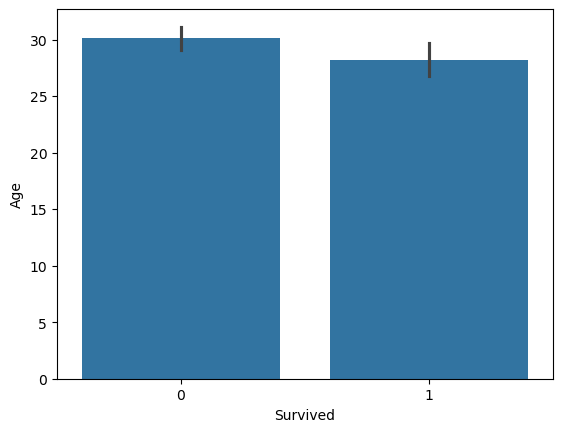

In [18]:
# create graph survived and age
import seaborn as sns
sns.barplot(x=df["Survived"],y=df["Age"])

<Axes: xlabel='Survived', ylabel='Age'>

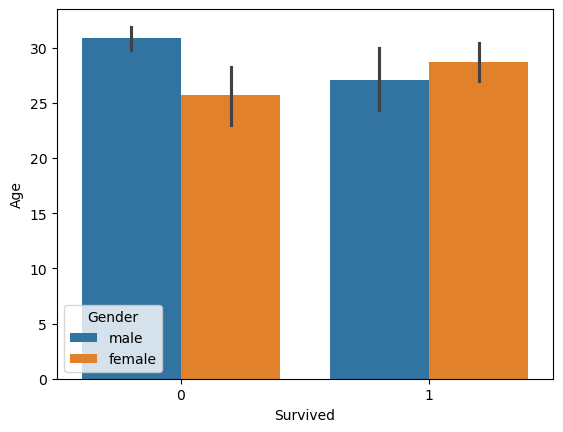

In [19]:
# create graph survived with age
sns.barplot(x=df["Survived"],y=df["Age"],hue=df["Gender"])

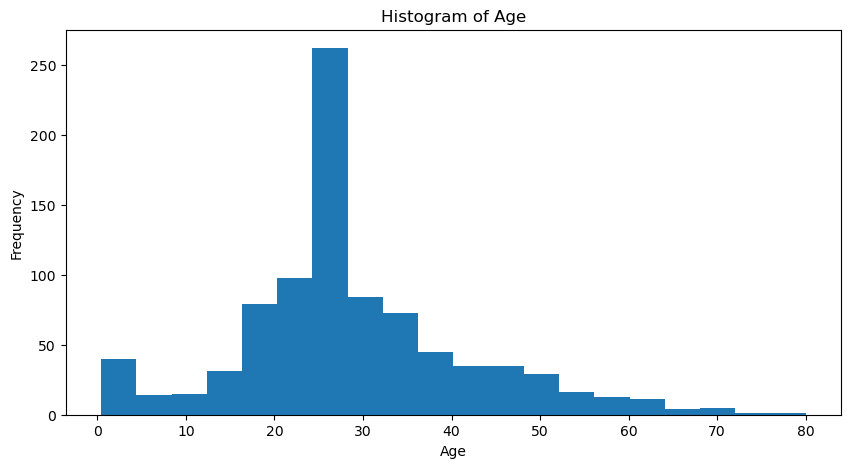

In [20]:
# histogram
plt.figure(figsize=(10,5))
plt.hist(df["Age"],bins=20)
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Histogram of Age")
plt.show()

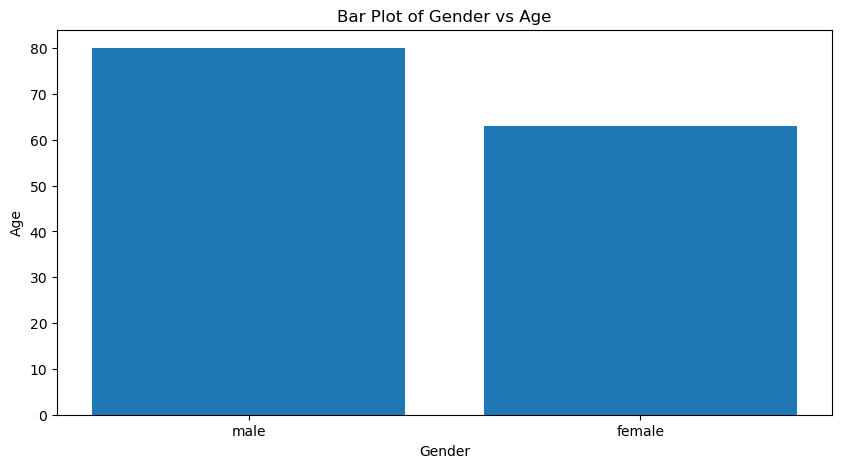

In [21]:
# bar plot
plt.figure(figsize=(10,5))
plt.bar(df["Gender"],df["Age"])
plt.xlabel("Gender")
plt.ylabel("Age")
plt.title("Bar Plot of Gender vs Age")
plt.show()

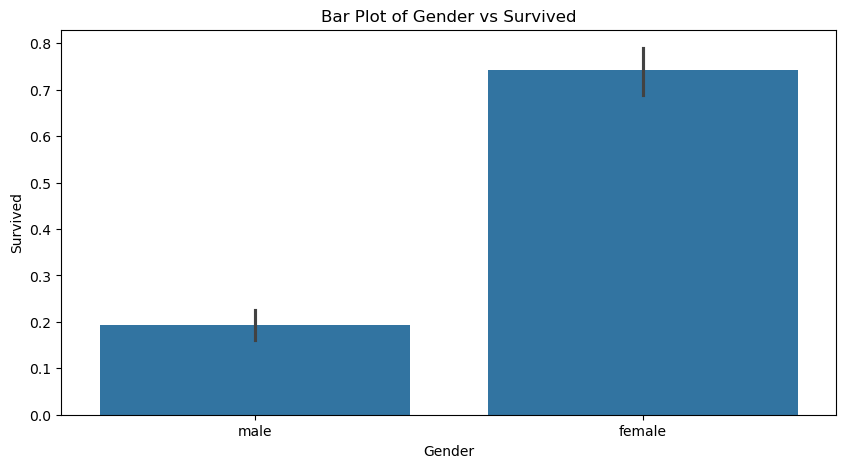

In [22]:
# bar plot
plt.figure(figsize=(10,5))
sns.barplot(x=df["Gender"],y=df["Survived"])
plt.xlabel("Gender")
plt.ylabel("Survived")
plt.title("Bar Plot of Gender vs Survived")
plt.show()

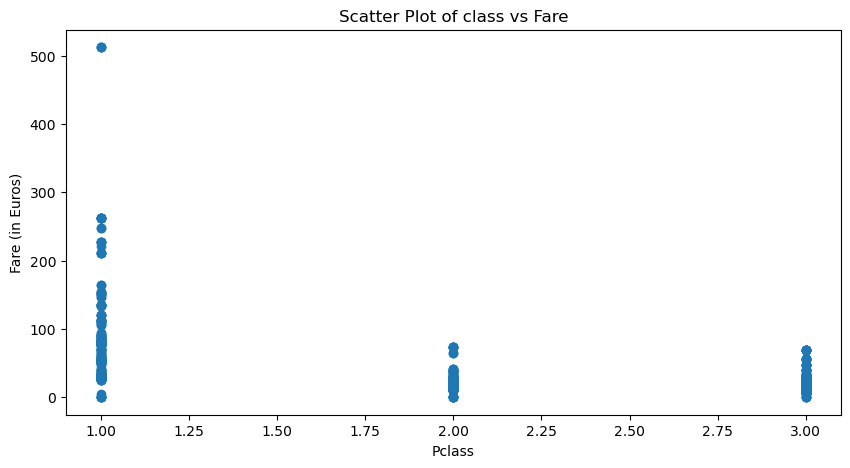

In [23]:
# Scatter plot :- preading of data in numerical format that count the any value related to column vise 
plt.figure(figsize=(10,5))
plt.scatter(df["Pclass"],df["Fare"])
plt.xlabel("Pclass")
plt.ylabel("Fare (in Euros)")
plt.title("Scatter Plot of class vs Fare")
plt.show()

In [24]:
# Count the male and female
df["Gender"].value_counts()

Gender
male      577
female    314
Name: count, dtype: int64

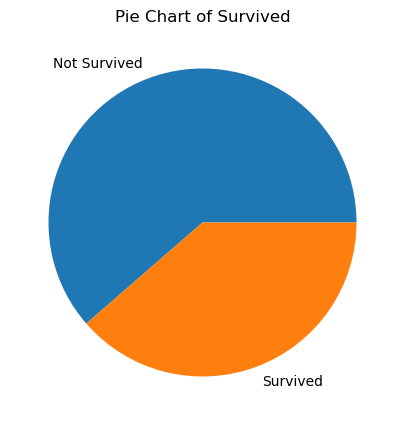

In [25]:
# create a pie chart on survived 
plt.figure(figsize=(10,5))
plt.pie(df["Survived"].value_counts(),labels=df["Survived"].value_counts().index.map({0: "Not Survived",1: "Survived"}))
plt.title("Pie Chart of Survived")
plt.show()

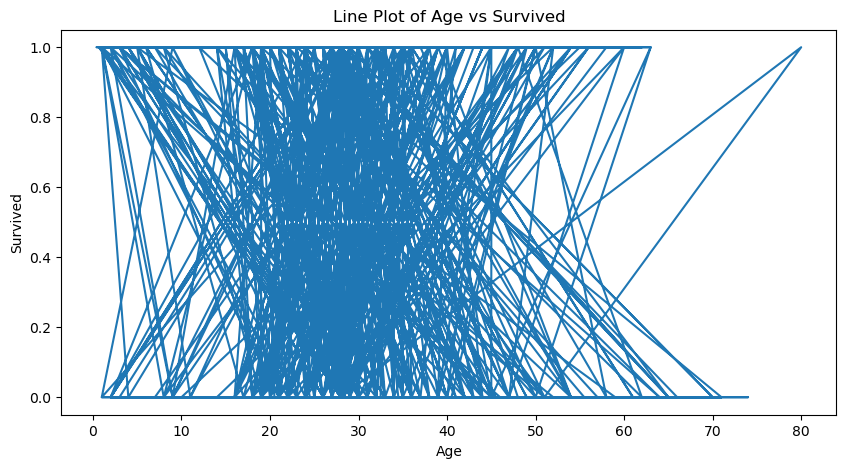

In [26]:
# Line plot of age and survived 
plt.figure(figsize=(10,5))
plt.plot(df["Age"],df["Survived"])
plt.xlabel("Age")
plt.ylabel("Survived")
plt.title("Line Plot of Age vs Survived")
plt.show()

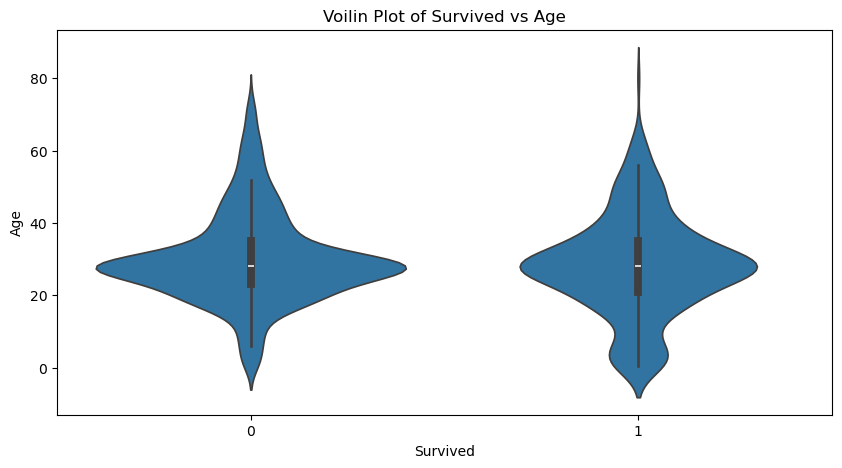

In [27]:
# Violin plot 
plt.figure(figsize=(10,5))
sns.violinplot(x=df["Survived"],y=df["Age"])
plt.xlabel("Survived")
plt.ylabel("Age")
plt.title("Voilin Plot of Survived vs Age")
plt.show()

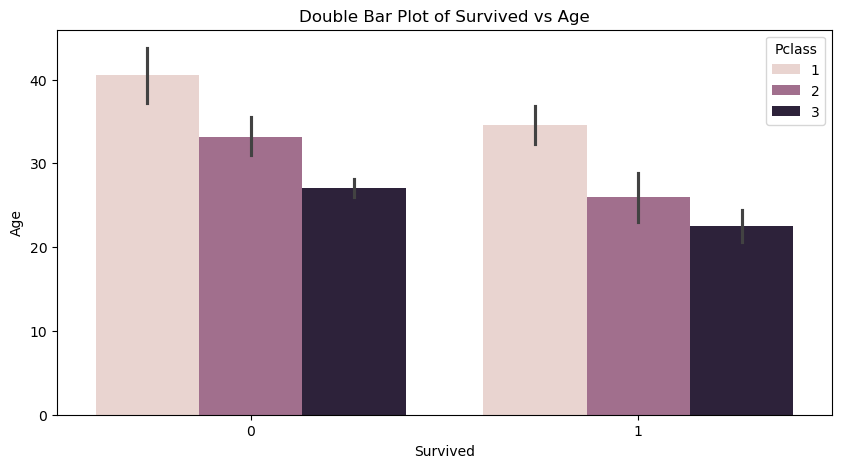

In [28]:
# Double bar plot on multiple coulumn age, survived, class and embarked
plt.figure(figsize=(10,5))
sns.barplot(x=df["Survived"],y=df["Age"],hue=df["Pclass"])
plt.xlabel("Survived")
plt.ylabel("Age")
plt.title("Double Bar Plot of Survived vs Age")
plt.show()

In [29]:
# use Iris data 
df = sns.load_dataset("iris")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
